<a href="https://colab.research.google.com/github/Aditi-Rai/Calculator/blob/main/Pneumonia_prediction(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install Kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aditi0729","key":"f21fa00923c47e6833f86e8b129dc64a"}'}

In [3]:
#create a Kaggle folder
! mkdir ~/.kaggle

In [4]:
#copy the Kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
#Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          18936        406  1.0              
rajatsurana979/fast-food-sales-report                       Restaurant Sales report                            122KB  2023-11-06 20:46:39            841         30  1.0              
redpen12/employees-satisfaction-analysis                    Employee Satisfaction Survey Data                  140KB  2023-11-03 08:56:49            993         27  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics D

In [7]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:25<00:00, 157MB/s]
100% 2.29G/2.29G [00:25<00:00, 97.9MB/s]


In [8]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [10]:
# Dataset Link- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [11]:
# For local system
path = '/content/chest_xray/chest_xray/train'
classes = os.listdir(path)
print(classes)




['PNEUMONIA', '.DS_Store', 'NORMAL']


In [12]:
# Define the directories for the X-ray images
PNEUMONIA_dir = os.path.join(path + '/' + classes[0])
NORMAL_dir = os.path.join(path + '/' + classes[1])

# Create lists of the file names in each directory
pneumonia_names = os.listdir(path)
normal_names = os.listdir(path)

print('There are ', len(pneumonia_names),
	'images of pneumonia infected in training dataset')
print('There are ', len(normal_names), 'normal images in training dataset')


There are  3 images of pneumonia infected in training dataset
There are  3 normal images in training dataset


In [13]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
pneumonia_images = [os.path.join(PNEUMONIA_dir, fname)
					for fname in pneumonia_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(pneumonia_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4
plt.show()


<Figure size 1600x800 with 0 Axes>

In [14]:
# Set the figure size
fig = plt.gcf()
fig.set_size_inches(16, 8)

# Select the starting index for the images to display
pic_index = 210

# Create lists of the file paths for the 16 images to display
normal_images = [os.path.join(NORMAL_dir, fname)
			for fname in normal_names[pic_index-8:pic_index]]
# Loop through the image paths and display each image in a subplot
for i, img_path in enumerate(normal_images):
	sp = plt.subplot(2, 4, i+1)
	sp.axis('Off')

	# Read in the image using Matplotlib's imread() function
	img = mpimg.imread(img_path)
	plt.imshow(img)

# Display the plot with the 16 images in a 4x4 grid
plt.show()


<Figure size 1600x800 with 0 Axes>

In [15]:
Train = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/train',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Test = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/test',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))
Validation = keras.utils.image_dataset_from_directory(
	directory='/content/chest_xray/chest_xray/val',
	labels="inferred",
	label_mode="categorical",
	batch_size=32,
	image_size=(256, 256))


Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(2, activation='sigmoid')
])


In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

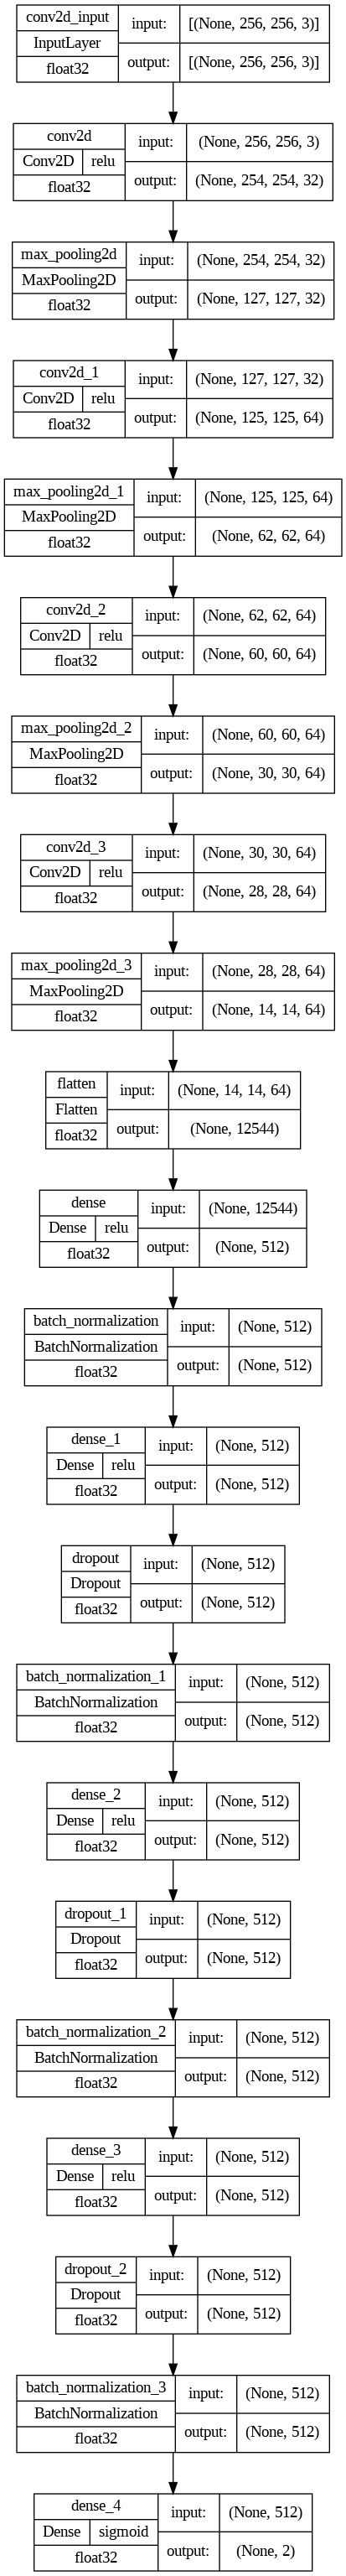

In [18]:
# Plot the keras model
keras.utils.plot_model(
	model,
	# show the shapes of the input/output tensors of each layer
	show_shapes=True,
	# show the data types of the input/output tensors of each layer
	show_dtype=True,
	# show the activations of each layer in the output graph
	show_layer_activations=True
)


In [19]:
model.compile(
	# specify the loss function to use during training
	loss='binary_crossentropy',
	# specify the optimizer algorithm to use during training
	optimizer='adam',
	# specify the evaluation metrics to use during training
	metrics=['accuracy']
)


In [ ]:
history = model.fit(Train,
		epochs=10,
		validation_data=Validation)


Epoch 1/10
163/163 [==============================] - 729s 4s/step - loss: 0.0553 - accuracy: 0.9803 - val_loss: 3.1890 - val_accuracy: 0.5000
Epoch 2/10
 17/163 [==>...........................] - ETA: 9:50 - loss: 0.0482 - accuracy: 0.9816

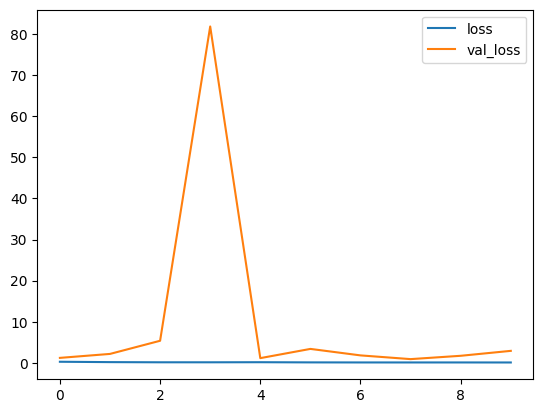

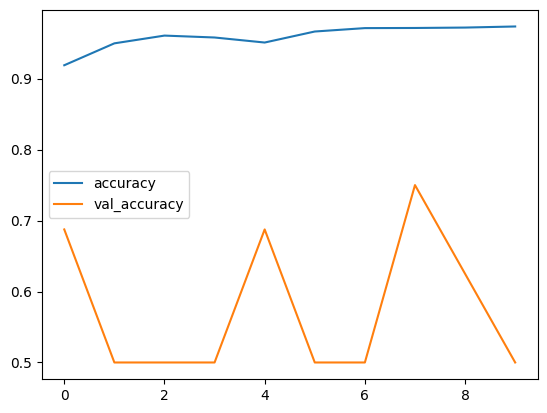

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [22]:
loss, accuracy = model.evaluate(Test)
print('The accuracy of the model on test dataset is',
	np.round(accuracy*100))


20/20 [==============================] - 25s 1s/step - loss: 2.1754 - accuracy: 0.6282
The accuracy of the model on test dataset is 63.0


In [ ]:
# Load the image from the directory
# "/content/chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg"
# with the target size of (256, 256)
test_image = tf.keras.utils.load_img(
	"/content/chest_xray/chest_xray/test/NORMAL/IM-0010-0001.jpeg",
	target_size=(256, 256))

# Display the loaded image
plt.imshow(test_image)

# Convert the loaded image into a NumPy array andz
# expand its dimensions to match the expected input shape of the model
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Use the trained model to make a prediction on the input image
result = model.predict(test_image)

# Extract the probability of the input image belonging
# to each class from the prediction result
class_probabilities = result[0]

# Determine the class with the highest probability and print its label
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")


1/1 [==============================] - 0s 103ms/step
Pneumonia


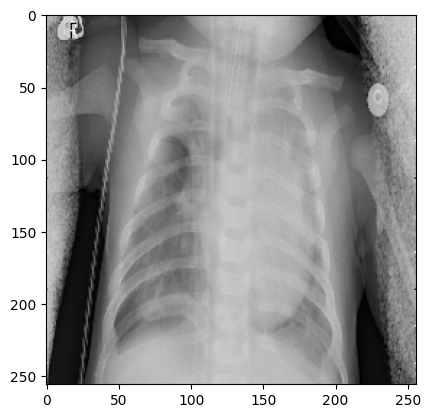

1/1 [==============================] - 0s 103ms/step
Pneumonia


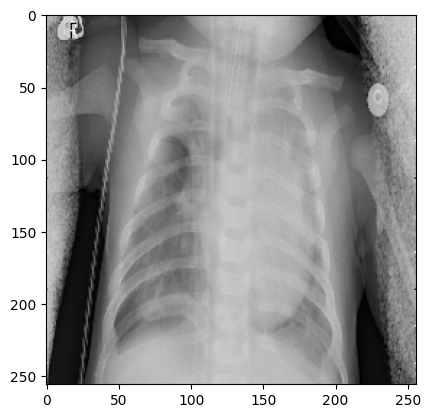

In [24]:
test_image = tf.keras.utils.load_img(
	"/content/chest_xray/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg",
	target_size=(256, 256))
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
class_probabilities = result[0]
if class_probabilities[0] > class_probabilities[1]:
	print("Normal")
else:
	print("Pneumonia")
